# Stock Price Prediction using Recurrent Neural Networks

**Prroblem Statement**:

The goal of this project is to build a Recurrent Neural Network (RNN) that can predict the future stock price of Apple Inc. based on its past stock price history.

Specifically, the RNN will take the stock price of the past 30 days as input and output the predicted stock price for the next day.

**Steps involved**:

> 1. Import necessary libraries such as numpy, pandas, matplotlib, scikit-learn, and tensorflow.keras.

> 2. Load the stock price data from a CSV file containing the historical data of Apple Inc.

> 3. Normalize the data using `MinMaxScaler` from scikit-learn.

> 4. Split the data into training and testing sets.

> 5. Create a function `create_dataset()` to prepare the data for the RNN, creating input and output pairs of data with a window size of 30 days.

> 6. Build the RNN model using `Sequential()` and add two layers of SimpleRNN, each with 50 units, and 1 `Dense()` output layer.

> 7. Compile the model using `adam` optimizer and mean squared error (MSE) as the loss function.

> 8. Train the model using the training data for 100 epochs.

> 9. Use the trained model to predict the stock price for the testing data.

> 10. Reverse the normalization done earlier using `MinMaxScaler` to get the stock prices back to their original values.

> 11. Plot actual stock prices versus predicted stock prices over the testing period.

**Expected output**:

> The output of this project will be a plot of the actual stock prices versus the predicted stock prices over the testing period.

> The plot will show whether the RNN model was successful in predicting the stock prices accurately.

> The predicted stock prices can also be used to make investment decision.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the dataset
data=pd.read_csv('AAPL.csv')
data=data['Close'].values.reshape(-1,1)

In [ ]:
# Normalize the data
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data)

In [ ]:
# Split the data into training and testing sets
train_data=data[:int(len(data)*0.8)]
test_data=data[int(len(data)*0.8):]

In [ ]:
len(train_data)

200

In [ ]:
len(test_data)

51

In [ ]:
# Prepare the data for the RNN
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

window_size = 30
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build the RNN model
# Build the Bidirectional RNN model
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
%%time
# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000
6/6 [==============================] - 10s 63ms/step - loss: 0.1244
Epoch 2/1000
6/6 [==============================] - 0s 57ms/step - loss: 0.0611
Epoch 3/1000
6/6 [==============================] - 0s 60ms/step - loss: 0.0376
Epoch 4/1000
6/6 [==============================] - 0s 63ms/step - loss: 0.0384
Epoch 5/1000
6/6 [==============================] - 0s 58ms/step - loss: 0.0238
Epoch 6/1000
6/6 [==============================] - 0s 60ms/step - loss: 0.0250
Epoch 7/1000
6/6 [==============================] - 0s 61ms/step - loss: 0.0208
Epoch 8/1000
6/6 [==============================] - 0s 61ms/step - loss: 0.0191
Epoch 9/1000
6/6 [==============================] - 0s 60ms/step - loss: 0.0147
Epoch 10/1000
6/6 [==============================] - 0s 59ms/step - loss: 0.0130
Epoch 11/1000
6/6 [==============================] - 0s 59ms/step - loss: 0.0132
Epoch 12/1000
6/6 [==============================] - 0s 63ms/step - loss: 0.0114
Epoch 13/1000
6/6 [=================

In [ ]:
# Make predictions
predictions = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [ ]:
predictions = scaler.inverse_transform(predictions)


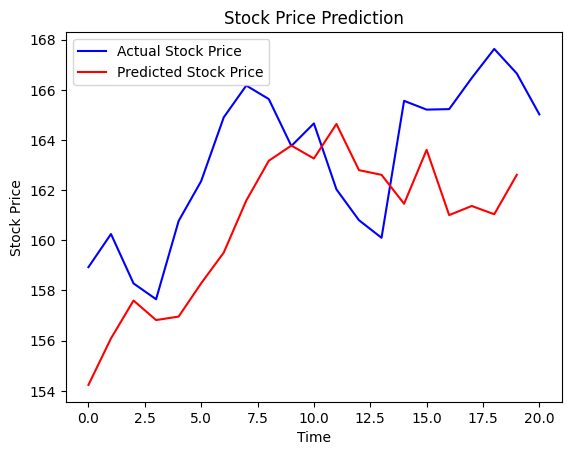

In [ ]:
# Plot the results
plt.plot(scaler.inverse_transform(test_data[window_size:]), color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()